### GRIP @ THE SPARKS FOUNDATION || June21

###  Name: Gloria Caron Miriam B
TECHNICAL TASK 2 - PREDICTION USING UNSUPERVISED ML (LEVEL-BEGINNER)

### Problem Statement 
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [1]:
# Importing the Required Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Importing the Dataset
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
x=iris.data
y=iris.target

In [4]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#To check for the No. of rows and columns
iris.shape

(150, 4)

We can see that there are 150 rows & 5 columns.

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Using the function “.info()” we can view a concise summary of the data.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


we can see that all the sepal length, sepal width, petal length and petal width are all of the type ”float”


###  Data Visualization 

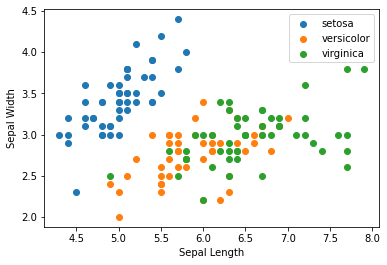

In [8]:
#between sepal length Vs sepal width
plt.scatter(x[y == 0, 0], x[y == 0, 1], label = 'setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label = 'versicolor')
plt.scatter(x[y == 2, 0], x[y == 2, 1], label = 'virginica')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

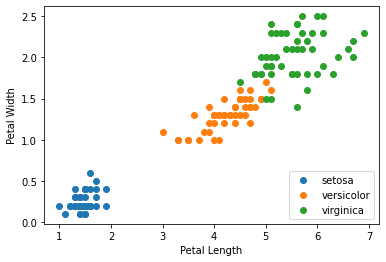

In [9]:
#between petal length Vs petal width
plt.scatter(x[y == 0, 2], x[y == 0, 3], label = 'setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], label = 'versicolor')
plt.scatter(x[y == 2, 2], x[y == 2, 3], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

###### CONCLUSION :
We can observe that petal length and petal width are the better predictors since setosa is clearly seperable in this case.

####  To Find the Optimum Number of Clusters using K Means Algorithm 

C:\Software\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


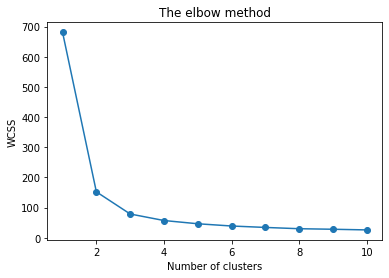

In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,'o-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Since we asked to find the optimum no. of clusters we use Elbow method to find the optimum K value.<br>
After plotting the graph we can observe that there is a drastic decrease in WCSS & after the point “3”  it decreases gradually hence, we take the optimum no. of  clusters as “3”.

In [11]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [12]:
iris['clusters']=y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Visualizing the Clusters of Sepal length and Sepal Width

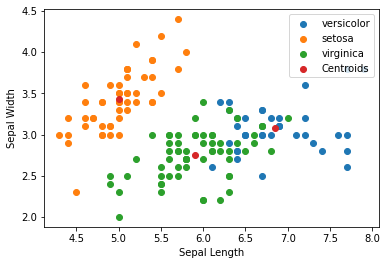

In [13]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], label = 'versicolor')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], label = 'setosa')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids using the cluster centres 

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Visualizing the Clusters of Petal length and Petal Width

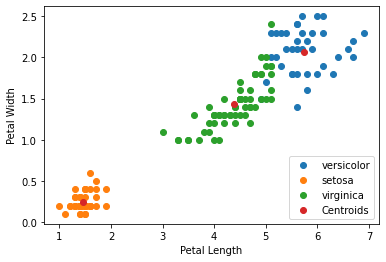

In [14]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], label = 'versicolor')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], label = 'setosa')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], label = 'virginica')

# Plotting the centroids using the cluster centres 

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Conclusion:
Thus, we have predicted the optimum number of clusters to be 3 and represented it visually.

## THANK YOU 